In [1]:
import json
import os
import string
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
os.chdir("../")

In [3]:
df = {
    "model": [], "type": [], "accuracy": [], "dataset": []
}

# Process main, raw, and midsae datasets
for dataset_type in ["main", "raw", "midsae"]:
    things = glob(f"data/evals/thingso1o/{dataset_type}*json")
    for file_path in things:
        with open(file_path) as f:
            data = json.load(f)

        if "ceiling_accuracy" in data.keys(): ceiling_acc = data["ceiling_accuracy"]
        
        df["model"].append(data["model_name"])
        df["type"].append("metalign")
        df["accuracy"].append(data["metalign_accuracy"])
        df["dataset"].append(dataset_type)

        df["model"].append(data["model_name"])
        df["type"].append("baseline")
        df["accuracy"].append(data["base_model_accuracy"])
        df["dataset"].append(dataset_type)

df = pd.DataFrame(df)
df["model"] = df["model"].map({
    "clip": "CLIP\n(Teacher)",
    "vit": "ViT\n(Supervised)",
    "dinov2": "DINOv2",
    "siglip2": "SigLIP2"
})
df["type"] = df["type"].map({
    "baseline": "Baseline",
    "metalign": "MetAlign"
})

levels_df = {
    "model": [], "type": [], "accuracy": [], "dataset": []
}
for dataset_type in ["main", "raw", "midsae"]:
    levels = glob(f"data/evals/levelso1o/{dataset_type}*json")
    for file_path in levels:
        with open(file_path) as f:
            data = json.load(f)
        if "ceiling_accuracy" in data.keys(): ceiling_acc = data["ceiling_accuracy"]
        levels_df["model"].append(data["model_name"])
        levels_df["type"].append("metalign")
        levels_df["accuracy"].append(data["metalign_accuracy"])
        levels_df["dataset"].append(dataset_type)
        
        levels_df["model"].append(data["model_name"])
        levels_df["type"].append("baseline")
        levels_df["accuracy"].append(data["base_model_accuracy"])
        levels_df["dataset"].append(dataset_type)
levels_df = pd.DataFrame(levels_df)
levels_df["model"] = levels_df["model"].map({
    "clip": "CLIP\n(Teacher)",
    "vit": "ViT\n(Supervised)",
    "dinov2": "DINOv2",
    "siglip2": "SigLIP2"
})
levels_df["type"] = levels_df["type"].map({
    "baseline": "Baseline",
    "metalign": "MetAlign"
})

    

category_dfs, reward_dfs = [], []
for dataset_type in ["main", "raw", "midsae"]:
    category_files = glob(f"data/evals/categorylearning/{dataset_type}*csv")
    reward_files = glob(f"data/evals/rewardlearning/{dataset_type}*csv")
    for file_path in category_files:
        sub_df = pd.read_csv(file_path)
        model_name = file_path.split("/")[-1].split(".")[0].split("_")[-1]
        sub_df["model"] = model_name
        sub_df["dataset"] = dataset_type
        category_dfs.append(sub_df)
    for file_path in reward_files:
        sub_df = pd.read_csv(file_path)
        model_name = file_path.split("/")[-1].split(".")[0].split("_")[-1]
        sub_df["model"] = model_name
        sub_df["dataset"] = dataset_type
        reward_dfs.append(sub_df)

    

category_df = pd.concat(category_dfs, ignore_index=True)
reward_df = pd.concat(reward_dfs, ignore_index=True)
category_df["model"] = category_df["model"].map({
    "clip": "CLIP\n(Teacher)",
    "vit": "ViT\n(Supervised)",
    "dinov2": "DINOv2",
    "siglip2": "SigLIP2"
})
reward_df["model"] = reward_df["model"].map({
    "clip": "CLIP\n(Teacher)",
    "vit": "ViT\n(Supervised)",
    "dinov2": "DINOv2",
    "siglip2": "SigLIP2"
})

category_df = category_df.melt(id_vars=["model", "participant", "dataset"], value_vars=["base_accuracy", "metalign_accuracy", "metalign_linear_accuracy"], var_name="type", value_name="accuracy")
reward_df = reward_df.melt(id_vars=["model", "participant", "dataset"], value_vars=["base_accuracy", "metalign_accuracy"], var_name="type", value_name="accuracy")
category_df["type"] = category_df["type"].map({
    "base_accuracy": "Baseline",
    "metalign_linear_accuracy": "MetAlign"
})
reward_df["type"] = reward_df["type"].map({
    "base_accuracy": "Baseline",
    "metalign_accuracy": "MetAlign"
})

order = ["CLIP\n(Teacher)", "ViT\n(Supervised)", "SigLIP2", "DINOv2"]

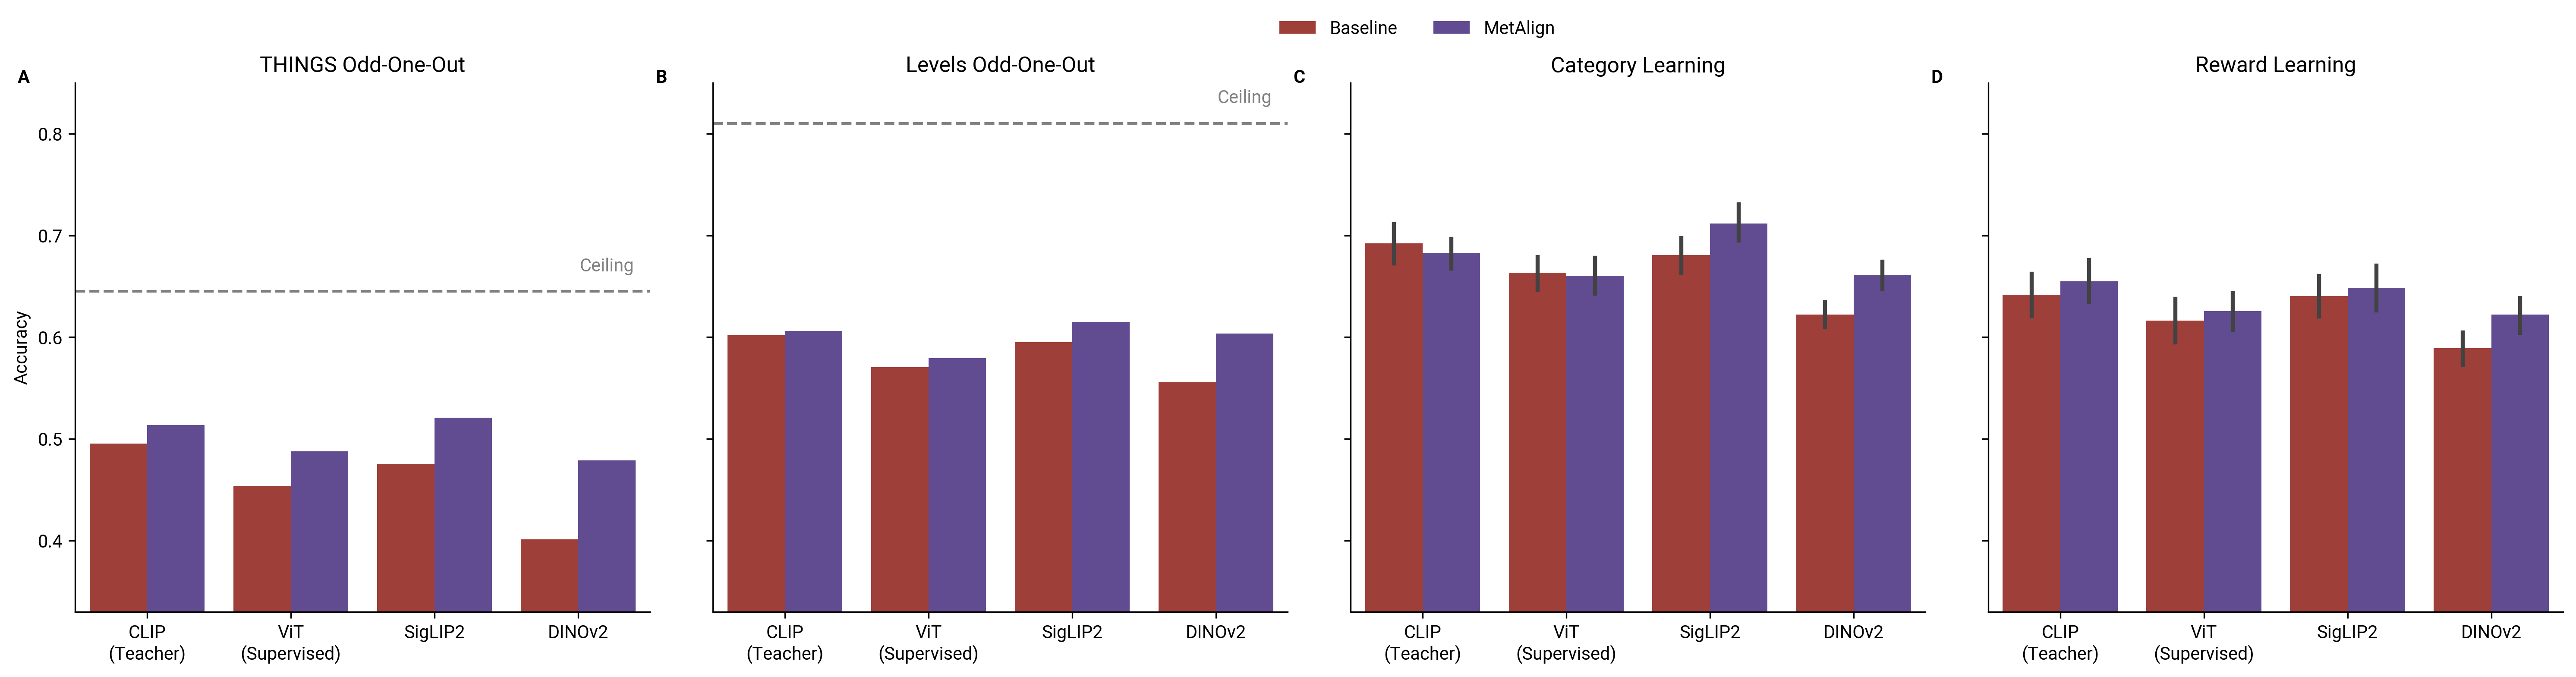

In [6]:
fig, axs = plt.subplots(1,4, figsize=(20,5), sharey=True)
sub_df = df[df["dataset"]=="main"]
sns.barplot(data=sub_df, x="model", y="accuracy", hue="type", ax=axs[0], hue_order=["Baseline", "MetAlign"], order=order)
# indicate ceiling
axs[0].axhline(ceiling_acc, color='gray', linestyle='--', label='Ceiling')
# write "Ceiling" above the line
axs[0].text(3.2, ceiling_acc+0.02, 'Ceiling', color='gray', ha='center')
axs[0].set_ylim(.33,.85)
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("")
axs[0].set_title("THINGS Odd-One-Out")

levels_sub_df = levels_df[levels_df["dataset"]=="main"]
sns.barplot(data=levels_sub_df, x="model", y="accuracy", hue="type", ax=axs[1], hue_order=["Baseline", "MetAlign"], order=order)
# indicate ceiling
axs[1].axhline(.81, color='gray', linestyle='--', label='Ceiling') # TODO: this is just reading from the figure of the paper, actually compute it
axs[1].text(3.2, .81+0.02, 'Ceiling', color='gray', ha='center')
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("")
axs[1].set_title("Levels Odd-One-Out")


sub_category_df = category_df[category_df["dataset"]=="main"]   
sns.barplot(data=sub_category_df, x="model", y="accuracy", hue="type", ax=axs[2], hue_order=["Baseline", "MetAlign"], order=order)
# indicate ceiling
axs[2].set_ylabel("Accuracy")
axs[2].set_xlabel("")
axs[2].set_title("Category Learning")

sub_reward_df = reward_df[reward_df["dataset"]=="main"]   
sns.barplot(data=sub_reward_df, x="model", y="accuracy", hue="type", ax=axs[3], hue_order=["Baseline", "MetAlign"], order=order)
axs[3].set_ylabel("Accuracy")
axs[3].set_xlabel("")
axs[3].set_title("Reward Learning")


# make a shared legend center upper
handles, labels = axs[2].get_legend_handles_labels()

# center the legend above the two plots
fig.legend(handles, labels, loc='upper center', ncol=3, frameon=False, bbox_to_anchor=(0.55, 1.05))
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()
axs[3].get_legend().remove()

for i,ax in enumerate(axs.flatten()):
    ax.text(-0.1, 1.0, string.ascii_uppercase[i], transform=ax.transAxes, weight="bold")

plt.tight_layout()
plt.show()


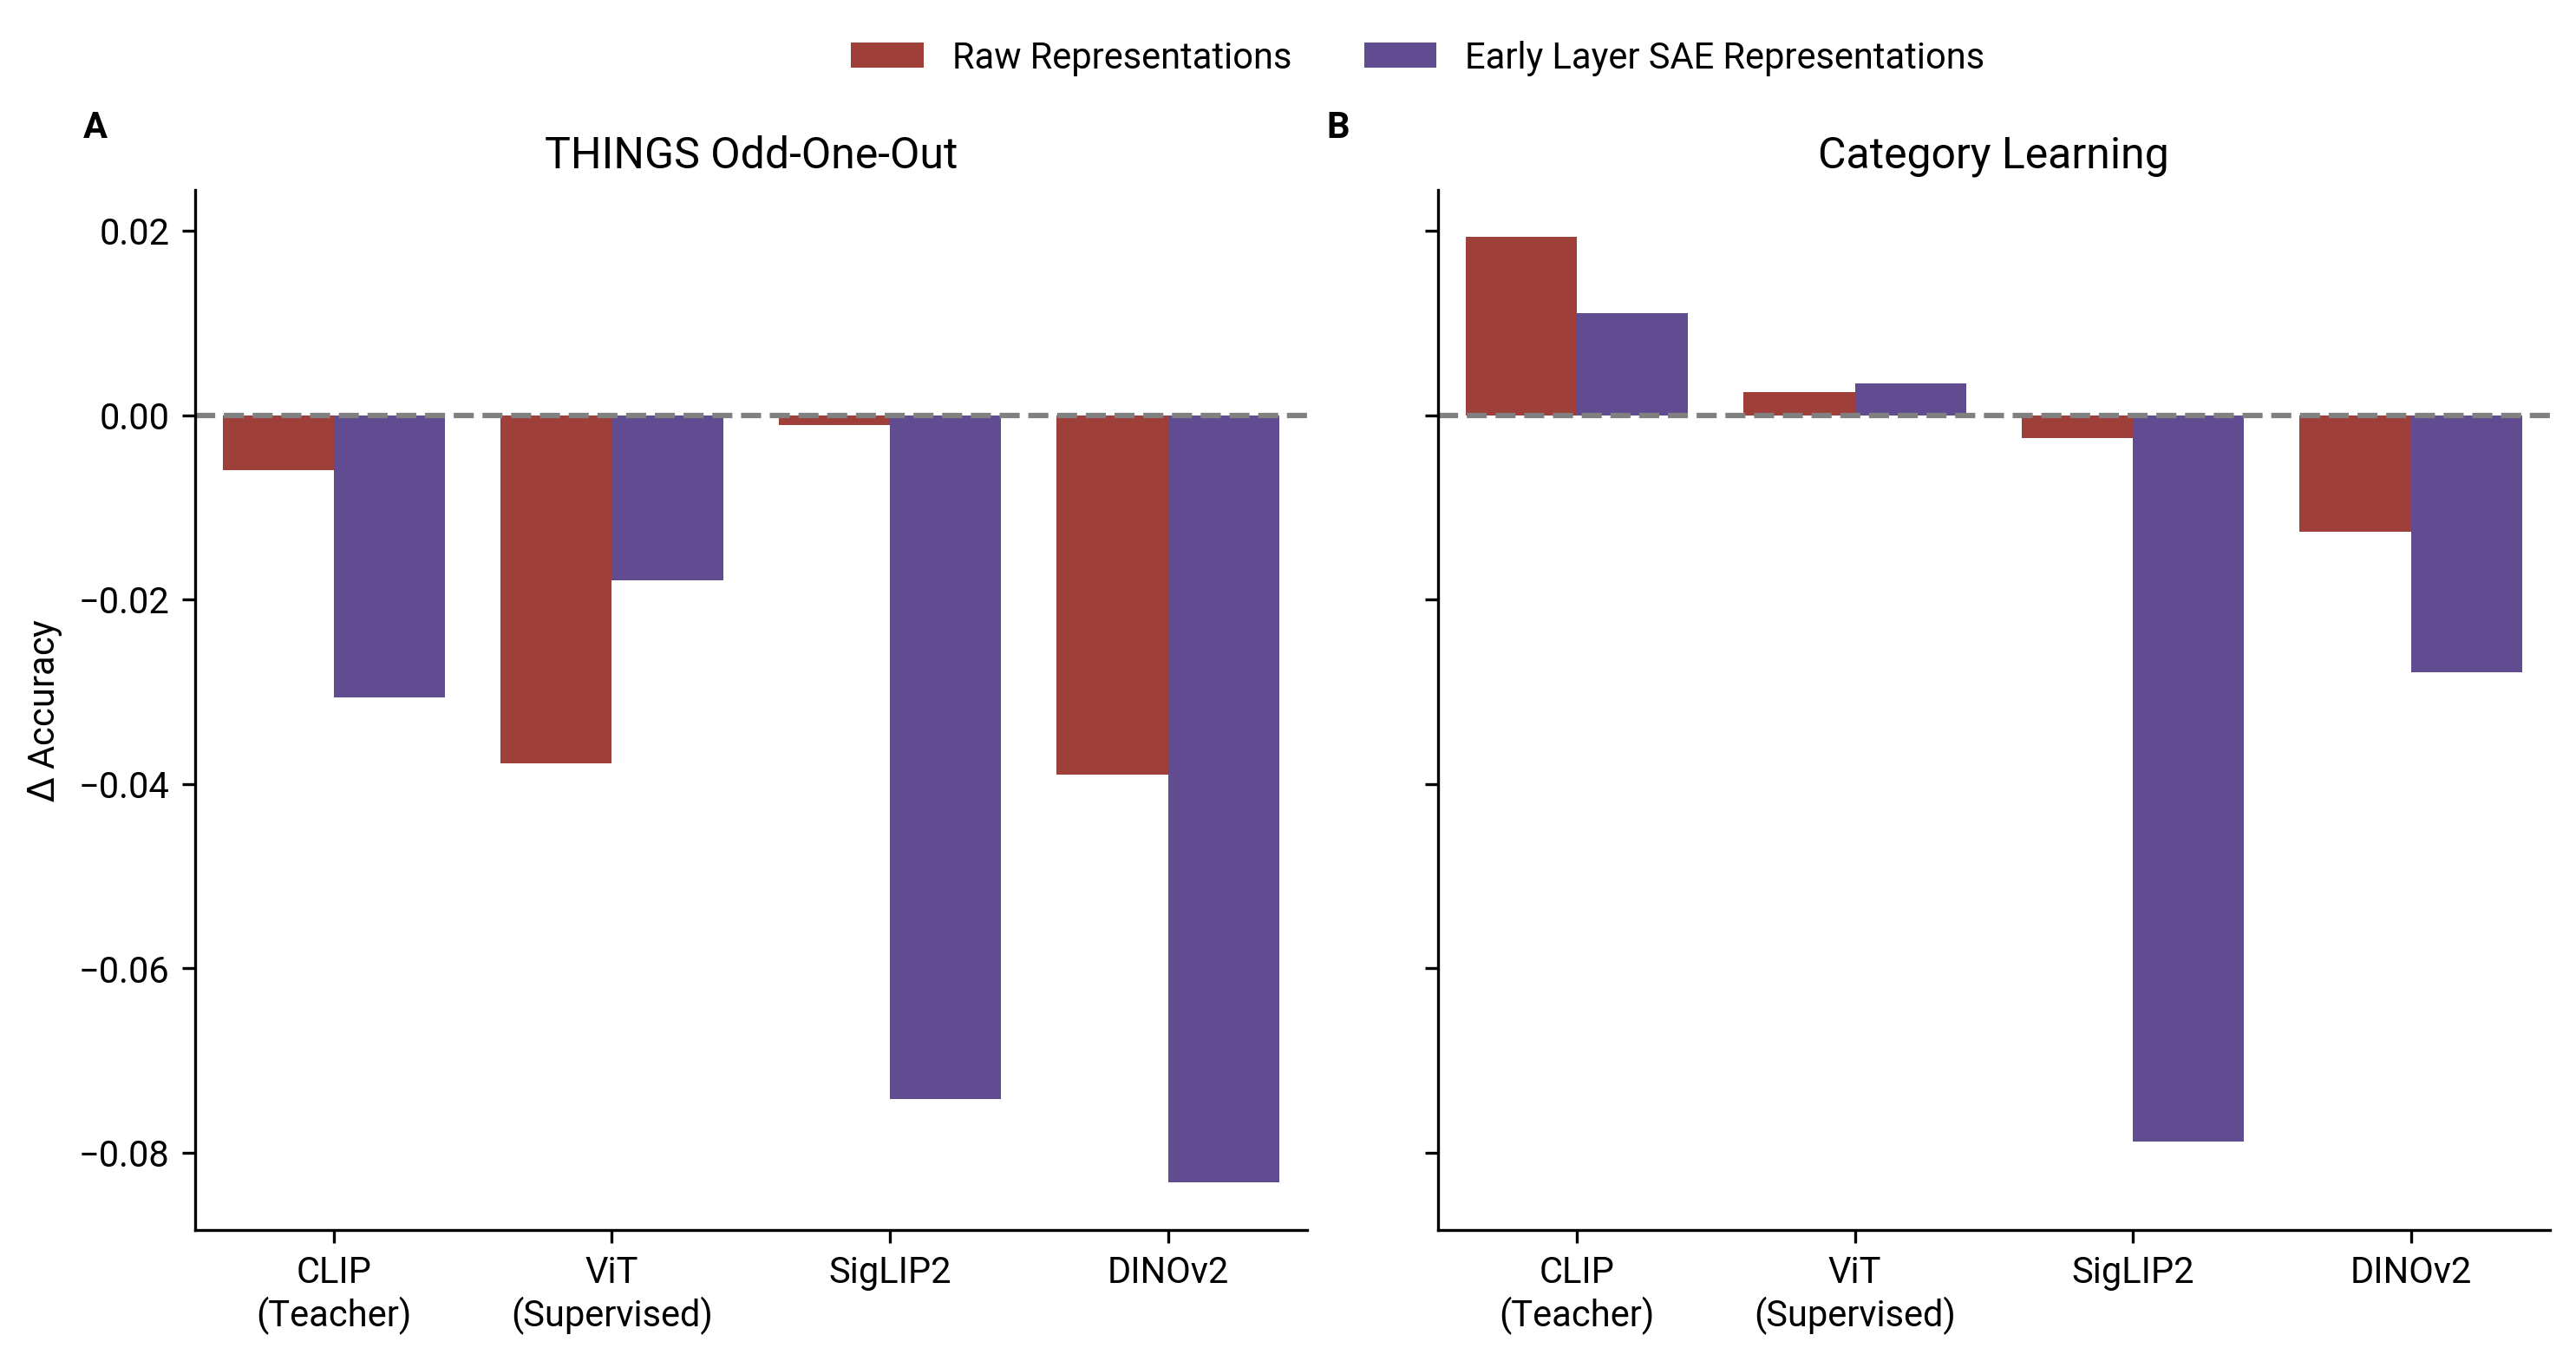

In [5]:
# Prepare data for the first subplot (THINGS Odd-One-Out)
metalign_df = df[df["type"] == "MetAlign"].copy()
pivot_df = metalign_df.pivot(index="model", columns="dataset", values="accuracy")
delta_df = pd.DataFrame({
    "model": pivot_df.index,
    "Raw Representations":  pivot_df["raw"] - pivot_df["main"],
    "Early Layer SAE Representations":pivot_df["midsae"] -  pivot_df["main"]
}).melt(id_vars="model", var_name="comparison", value_name="delta_accuracy")

# Prepare data for the second subplot (Category Learning)
metalign_category_df = category_df[category_df["type"] == "MetAlign"].copy()
grouped_category_df = metalign_category_df.groupby(["model", "dataset"])["accuracy"].mean().reset_index()
pivot_category_df = grouped_category_df.pivot(index="model", columns="dataset", values="accuracy")
delta_category_df = pd.DataFrame({
    "model": pivot_category_df.index,
    "Raw Representations": pivot_category_df["raw"] - pivot_category_df["main"] ,
    "Early Layer SAE Representations":  pivot_category_df["midsae"] - pivot_category_df["main"]
}).melt(id_vars="model", var_name="comparison", value_name="delta_accuracy")

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# First subplot
sns.barplot(data=delta_df, x="model", y="delta_accuracy", hue="comparison", ax=axs[0], order=order)
axs[0].set_ylabel(r"$\Delta$ Accuracy")
axs[0].set_xlabel("")
axs[0].set_title("THINGS Odd-One-Out")
axs[0].axhline(0, color='gray', linestyle='--')

# Second subplot
sns.barplot(data=delta_category_df, x="model", y="delta_accuracy", hue="comparison", ax=axs[1], order=order)
axs[1].set_ylabel("")
axs[1].set_xlabel("")
axs[1].set_title("Category Learning")
axs[1].axhline(0, color='gray', linestyle='--')

# Shared legend
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, frameon=False, bbox_to_anchor=(0.55, 1.05))
axs[0].get_legend().remove()
axs[1].get_legend().remove()

# Subplot labels
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.1, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, weight="bold")

plt.tight_layout()
plt.show()